## Correlation Matrix

## Correlation between the balance, amount and status

In [5]:
import pandas as pd

df = pd.read_csv("./preprocessed/mergedTrainData.csv")
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_id,years_since_loan,amount,duration,payments,status,balance,years_since_acc_open,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of cities,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,unemployment_rate,no. of commited crimes,no. of municipalities with inhabitants > 2000
loan_id,1.000000,0.055287,-0.021771,-0.009948,-0.037430,0.129074,-0.082356,0.060748,0.129056,-0.025736,-0.019777,-0.077585,0.101095,0.134606,0.109215,-0.081613,0.122182,-0.026718
years_since_loan,0.055287,1.000000,-0.147766,-0.204361,0.012850,-0.019787,-0.012309,0.810250,0.080041,-0.048370,-0.011604,-0.054147,0.017204,0.074175,0.108832,-0.077066,0.088939,-0.016232
amount,-0.021771,-0.147766,1.000000,0.589199,0.656692,-0.122624,0.120027,-0.088207,-0.005577,0.085493,0.072537,0.007818,-0.051609,-0.013245,0.007938,-0.007643,-0.005219,0.062395
duration,-0.009948,-0.204361,0.589199,1.000000,-0.113818,0.006797,-0.003545,-0.129259,-0.045128,0.046839,0.051847,0.028011,-0.051454,-0.044950,-0.017267,-0.003873,-0.049234,0.051110
payments,-0.037430,0.012850,0.656692,-0.113818,1.000000,-0.174041,0.126427,0.002734,-0.026518,0.092826,0.074642,0.043103,-0.065834,-0.032732,-0.027693,0.021738,-0.023470,0.065685
status,0.129074,-0.019787,-0.122624,0.006797,-0.174041,1.000000,0.210306,-0.021103,-0.017307,0.069428,0.060355,0.039672,-0.028302,0.013151,0.015279,-0.006958,-0.020618,0.058712
balance,-0.082356,-0.012309,0.120027,-0.003545,0.126427,0.210306,1.000000,-0.087051,-0.059235,0.062284,0.115633,0.024630,-0.101948,-0.061684,-0.040078,-0.000447,-0.062015,0.107288
years_since_acc_open,0.060748,0.810250,-0.088207,-0.129259,0.002734,-0.021103,-0.087051,1.000000,0.045038,-0.009213,0.011574,-0.000487,0.000921,0.027822,0.076175,-0.079333,0.054706,0.003819
no. of inhabitants,0.129056,0.080041,-0.005577,-0.045128,-0.026518,-0.017307,-0.059235,0.045038,1.000000,-0.529070,-0.556502,-0.623424,0.707745,0.918821,0.716621,-0.522385,0.995728,-0.569807
no. of municipalities with inhabitants < 499,-0.025736,-0.048370,0.085493,0.046839,0.092826,0.069428,0.062284,-0.009213,-0.529070,1.000000,0.462628,0.376582,-0.631123,-0.609945,-0.319684,0.110407,-0.512178,0.414144


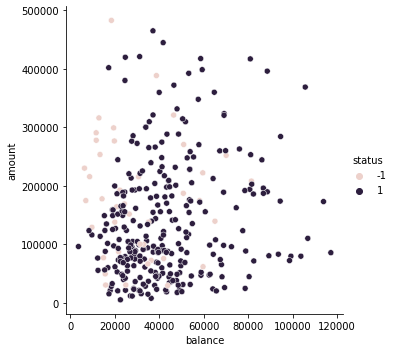

In [6]:
import seaborn as sns

sns.relplot(y="amount", x="balance", hue="status", data=df);

Looking at this plot, we can observe that most of the unsuccessful loans are usually located on the left part of the chart, which means that people with low balances on their accounts are prone to fail loan payments.

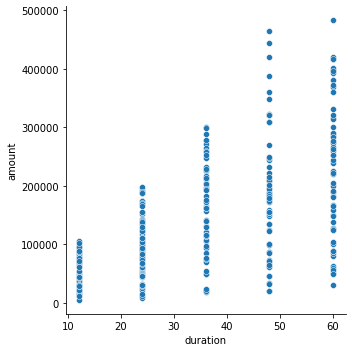

In [7]:
sns.relplot(y="amount", x="duration", data=df);

As we can see in this plot, higher duration loans result typically in higher amounts.

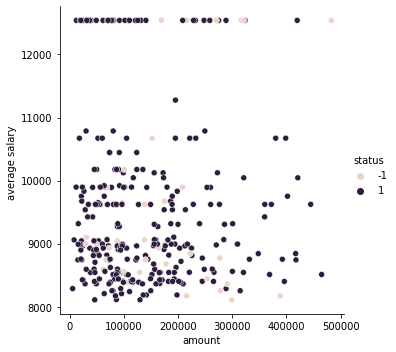

In [8]:
sns.relplot(x="amount", y="average salary ", hue="status", data=df);